In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
UnEmp = pd.read_csv('D:\ML_Project_Code_L00157079\ML_Last_DataSet.csv')
UnEmp

,Year,Month,No.Of Males Unemployed(15M24),No.Of Females Unemployed (15M24),Total No.Of persons Unemployed(15M24),Percentage of Males Unemployed(15M24),Percentage of Females Unemployed(15M24),Percentage of all persons Unemployed(15M24),No.Of Males Unemployed(25M74),No.Of Females Unemployed (25M74),Total No.Of persons Unemployed(25M74),Percentage of Males Unemployed(25M74),Percentage of Females Unemployed(25M74),Percentage of all persons Unemployed(25M74)
0,2014,1,30200.0,22200.0,52400.0,28.0,23.7,26.0,134100.0,76400.0,210500.0,12.4,8.8,10.8
1,2014,2,30600.0,21600.0,52200.0,28.5,23.5,26.2,133900.0,75000.0,208900.0,12.4,8.6,10.7
2,2014,3,30000.0,21500.0,51400.0,28.1,23.5,26.0,133100.0,73900.0,207000.0,12.3,8.5,10.6
3,2014,4,28800.0,21000.0,49800.0,27.3,23.2,25.4,131800.0,70200.0,202000.0,12.2,8.1,10.4
4,2014,5,28100.0,20400.0,48500.0,26.8,22.7,24.9,130200.0,69900.0,200100.0,12.1,8.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2020,78,17500.0,20800.0,38300.0,14.2,17.6,15.9,48700.0,35100.0,83800.0,4.3,3.7,4.0
78,2020,79,24800.0,22700.0,47500.0,18.1,17.4,17.8,52800.0,47700.0,100500.0,4.6,4.9,4.7
79,2020,80,28600.0,23200.0,51900.0,19.6,16.8,18.2,55900.0,56800.0,112700.0,4.8,5.7,5.2
80,2020,81,33700.0,25900.0,59700.0,21.7,17.7,19.8,58100.0,62700.0,120800.0,4.9,6.3,5.6


In [3]:
X_Yr = UnEmp['Year'].values.reshape(-1,1)
y_UnEmp = UnEmp['Total No.Of persons Unemployed(15M24)'].values.reshape(-1,1)

In [4]:
X_UnEmp, X_test_UnEmp, y_UnEmp, y_test_UnEmp = train_test_split(X_Yr, y_UnEmp, test_size=0.2, random_state=0)

In [5]:
# method 1 : Linear Regression

In [6]:
L_regression=LinearRegression()
L_regression.fit(X_UnEmp,y_UnEmp)

LinearRegression()

In [7]:
y_pred=L_regression.predict(X_test_UnEmp)

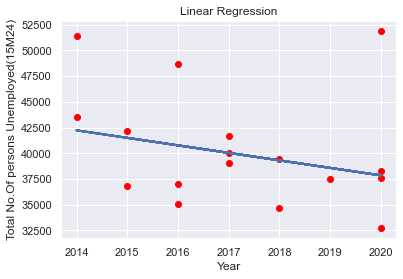

In [8]:
plt.scatter(X_test_UnEmp,y_test_UnEmp,color='red') 
plt.plot(X_test_UnEmp,y_pred,linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Total No.Of persons Unemployed(15M24)')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_UnEmp, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_UnEmp, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_UnEmp, y_pred)))

Mean Absolute Error: 3619.508171366706
Mean Squared Error: 27519623.08495988
Root Mean Squared Error: 5245.914894940623


In [10]:
# Method 2 : Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_PR = PolynomialFeatures(degree=3)
X = poly_reg_PR.fit_transform(X_Yr)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [12]:
from sklearn.linear_model import SGDRegressor, LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_UnEmp,y_UnEmp)

#predicting the value
y_pred = lin_reg.predict(X_test_UnEmp)
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_UnEmp, y_pred)
print("Coefficient of Determination using ols method for Polynomial Regression = ",r_squared)

Coefficient of Determination using ols method for Polynomial Regression =  0.07275654914373131


In [13]:
# Method 3 : Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 100)
dtr.fit(X_UnEmp, y_UnEmp)
y_pred = dtr.predict(X_test_UnEmp)
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_UnEmp, y_pred)
print("Coefficient of Determination using ols method For Decision Tree Regressor = ",r_squared)
#print(dtr.score(X_test_PR,y_test_PR))
#print("mean_squared_error=",(y_test_PR, y_pred))

Coefficient of Determination using ols method For Decision Tree Regressor =  0.012872954954784133


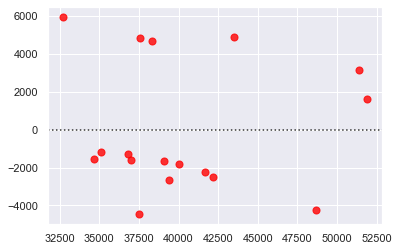

In [15]:
sns.residplot(y_test_UnEmp, y_pred, color="red", scatter_kws={"s": 50})

In [16]:
# Method 4 : K-nearest Neighbours Regression

In [17]:
from sklearn import neighbors
knn_PR = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_PR.fit(X_UnEmp, y_UnEmp)

predicted = knn_PR.predict(X_test_UnEmp)
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_UnEmp, y_pred)
print("Coefficient of Determination using ols method For K-nearest Neighbours Regression = ",r_squared)

Coefficient of Determination using ols method For K-nearest Neighbours Regression =  0.012872954954784133
